# About this Dataset:

- Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set default properties for plotting 
plt.rcParams['figure.figsize'] = [11, 4]
plt.rcParams['figure.dpi'] = 100 

In [2]:
raw_df = pd.read_csv("H:\\Data Science Repository\\Projects\\netflix time series analysis\\netflix_titles.csv")

In [3]:
raw_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


# Task 1: Countthe number of shows added per day
- In the following section, we will parse the raw date format
- into pandas datetime and summarize the daily shows added to the total number

- Parse timestamp into datetime column 
- Change the raw format to a pandas datetime format.
- Once we have changed the format as such, we will be able to
- apply more functionalities illustrated below

- Count shows added per date 
- All the shows have been listed in the original dataframe.
- Now let's count the total number of shows added per day

In [4]:
# leave the raw dataFrame and take a copy for processing
df = raw_df.copy()

In [5]:
# convert the date col to date type
df['date_added'] = pd.to_datetime(df['date_added'])

In [9]:
show_count = df.groupby('date_added')[['show_id']].count()

In [11]:
show_count

,show_id
date_added,
2008-01-01,1
2008-02-04,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
...,...
2020-01-14,4
2020-01-15,9
2020-01-16,10


# Task 2: Extract the day name and sum-up the shows added

- In the last step, we have used the date_added column to count the number of shows.
- Since we've used the groupby functionality to count the number of shows,
- the column is set as our index.
- We could now use our new index directly to extract the Attributes of the timestamp.
- One example of those Attributes is the day_name.
- Check out the full list of the attributes here.

In [13]:
show_count['day_of_week'] = show_count.index.day_name()

In [14]:
show_count

,show_id,day_of_week
date_added,,
2008-01-01,1,Tuesday
2008-02-04,1,Monday
2009-05-05,1,Tuesday
2009-11-18,1,Wednesday
2010-11-01,1,Monday
...,...,...
2020-01-14,4,Tuesday
2020-01-15,9,Wednesday
2020-01-16,10,Thursday


In [15]:
show_count.groupby('day_of_week').sum()

,show_id
day_of_week,
Friday,1910
Monday,694
Saturday,598
Sunday,564
Thursday,854
Tuesday,845
Wednesday,758


# Task 3: Select data from 2016 onwards

- You can also use the regular masking way to select and filter entries.
- The syntax is even simpler than one could expect. You don't even need to parse
- your filtering criteria to datetime. A simple string with %YYYY-%MM-%DD format
- will do the job

<AxesSubplot: xlabel='date_added'>

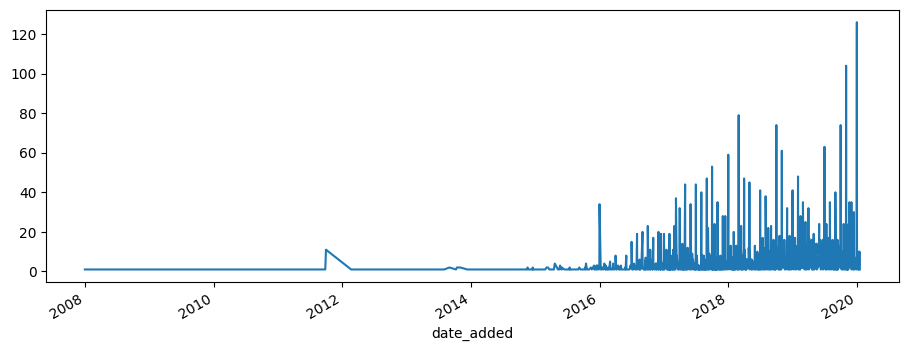

In [18]:
show_count['show_id'].plot()

In [19]:
mask = show_count.index >= '2016-01-01'

In [21]:
show_count = show_count[mask].copy()

In [22]:
show_count

,show_id,day_of_week
date_added,,
2016-01-01,34,Friday
2016-01-08,1,Friday
2016-01-13,1,Wednesday
2016-01-15,2,Friday
2016-01-22,1,Friday
...,...,...
2020-01-14,4,Tuesday
2020-01-15,9,Wednesday
2020-01-16,10,Thursday


<AxesSubplot: xlabel='date_added'>

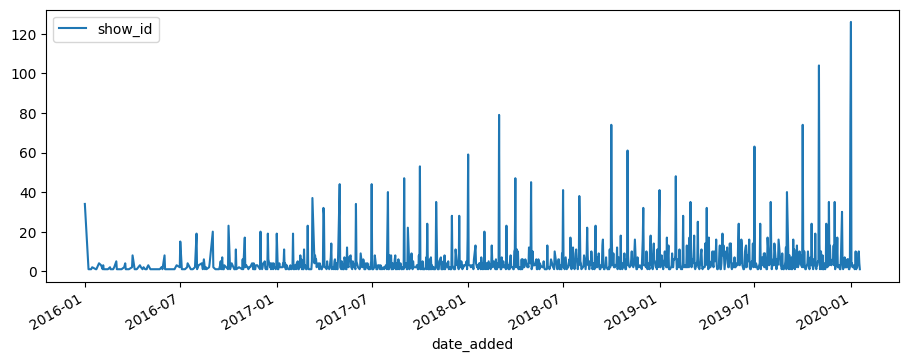

In [30]:
show_count.plot()

# Task 4: Sum up weekly data

- It is possible to change the granularity of your timeseries directly using Pandas datetie module.

- To do that, you need to specify two things:

- Your new granularity passed as an argument to the resample function. Read more details
- The function that will be used to generate the new granularity

In [26]:
weekly_data = show_count[['show_id']].resample('1W').sum()

In [27]:
weekly_data

,show_id
date_added,
2016-01-03,34
2016-01-10,1
2016-01-17,3
2016-01-24,2
2016-01-31,4
...,...
2019-12-22,20
2019-12-29,19
2020-01-05,213


<AxesSubplot: xlabel='date_added'>

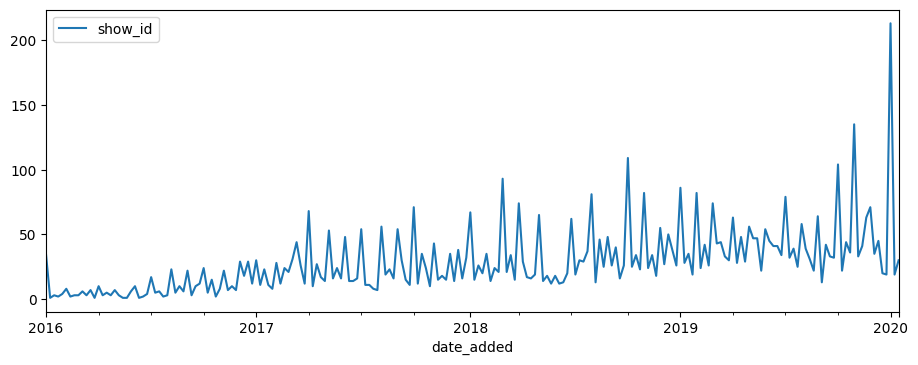

In [28]:
weekly_data.plot()